# Exercise  2 - LTI systems

## Objectives
- To investigate properties of LTI systems
- To learn about the different representations of LTI systems
- To understand the concept of convolution


In [4]:
import os
os.makedirs('results/ex2', exist_ok=True)

## Lab Exercise

### Impulse response representation
<img src="/img/ex2b_1.svg.svg" alt="Drawing" style="width: 900px;"/>
<center>Figure 2.1: Impulse response of a LTI system</center>

Suppose we apply a unit impulse function, $\delta[n]$, as an input to a Linear Time-Invariant (LTI) system. The output is the impulse response of the digital system, $h[n]$, as shown  in  Fig. 2.1. Since the discrete-time system is time-invariant, the filter response to $\delta[n-k]$ is $h[n-k]$. 

In general, any input signal $x[n]$ can be decomposed into signal values at each time sample, i.e.

$$ x[n]=\big[x[0]\delta[n], {x[1]\delta[n-1]}, \cdots, {x[N]\delta[n-N]}\big]$$
Consequently, the filter output is 

$\boldsymbol{y}[n]=x[0]h[n]+x[1]{h[n-1]}+\cdots+x[N]{h[n-N]}$ This is defined as **linear convolution**.

#### Example
Consider a sequence of unit impulses of length $(N+1)$ as the input, $\big[\delta[n],{\delta[n-1]},\cdots,{\delta[n-N]}\big]$. Due to linearity, the response of the digital filter will be the sum of the outputs i.e. $y[n]=h[n]+{h[n-1]}+\cdots+{h[n-N]}$. 

<img src="img/ex5_2.svg" alt="Drawing" style="width: 900px;"/>
<center>Figure 2.2: Linear convolution in time domain</center>

---
####  Definition
$$\text{Linear Convolution: }y[n]=x[n]*h[n]\overset{\Delta}{=}\sum^\infty_{k=-\infty}x[k]h[n-k]$$

---

If we substitute $r$ for $n-k$ this becomes:
$$y[n]=\sum_{r=-\infty}^{\infty}h[r]x[n-r]$$

Thus, for any linear time-invariant (LTI) filter, the output values consist of the sum of the past input values, weighted by the elements of the impulse response $h[n]$. This has been shown in Fig. 2.2. 

**Question 2.1** What information is needed in order to compute the output of a discrete-time LTI system?


**The past input values into the system and the systems unit impulse response**


**Question 2.2** Implement a linear convolution using your own `my_conv` function in the cell below. Verify that it gives you the correct result using the example in Fig 2.2.
> **GTA Tip**
>
> - The length of `y` is always `len(x)+len(h)-1`.
> - You can shift all elements of the array `x` by `nshift` elements using `np.roll(x,nshift)`.
> - You can multiply all alements of the array `x` by a scalar `c` using `x*c`.
> - You can verify that your implementation is correct by using the `np.convolve()` function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

def my_conv(x,h):
    y=np.zeros((len(x)+len(h)-1)) # This is always true
    H=np.append(np.zeros(len(x)-1), h) # append H with zeros so that len(H)=len(y)
    X=np.append(x, np.zeros(len(h)-1)) # append X with zeros so that len(X)=len(y)
    
    for n in range(len(h)):
        np.roll(X,1)
        M = np.multiply(X,H)
        np.append(y,np.sum(M))        
        
    X = [x, np.zeros(len(h)-1)]
    H = [H[i] for i in range(len(h)-1, len(H))]

    for k in range(len(H)):
        np.roll(X,1)
        M = np.multiply(X,H)
        np.append(y,np.sum(M))        
    return y
    
x=[0,1,1,1] # this is the example in Fig 2.2
h = [0.6, 0.8, 1, 0.3] # this is the example in Fig 2.2

y=my_conv(x,h)

plt = plot_signal(y, title='Linear Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex2/ex2_linear_convolution.pdf')
plt.show()
    

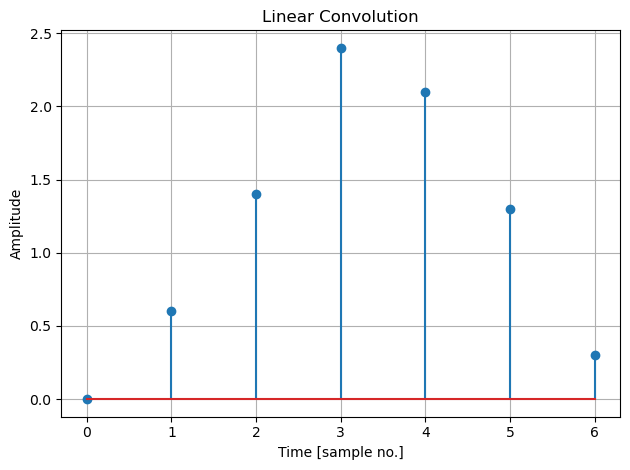

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

x=[0,1,1,1] # this is the example in Fig 2.2
h = [0.6, 0.8, 1, 0.3] # this is the example in Fig 2.2

y=np.convolve(x,h)

plt = plot_signal(y, title='Linear Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex2/ex2_linear_convolution.pdf')
plt.show()

**Question 2.3** What will the output `y` be if you change `x` to `[0,0,0,1,1,1]`? Check your answer using `my_conv`.

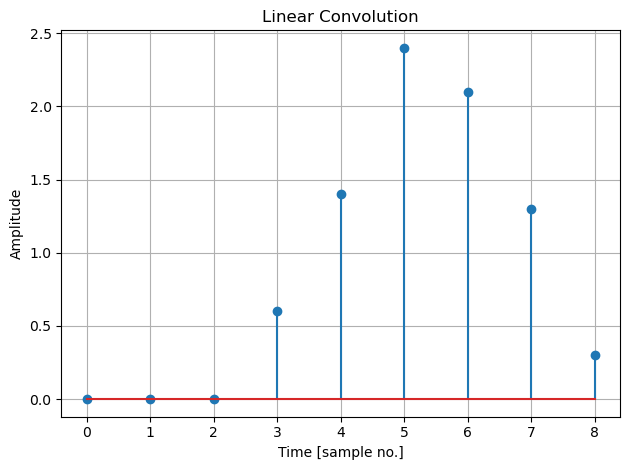

In [8]:
# result (output y) came out to be the same when hand calculation is performed but this time it is shifted right due to the additional 0s

import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

x=[0,0,0,1,1,1] # this is the example in Fig 2.2
h = [0.6, 0.8, 1, 0.3] # this is the example in Fig 2.2

y=np.convolve(x,h)

plt = plot_signal(y, title='Linear Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex2/ex2_linear_convolution.pdf')
plt.show()

**Question 2.4** Similarly, what will the output `y` be if you change `x` to `[0, 2, 2, 2]`?

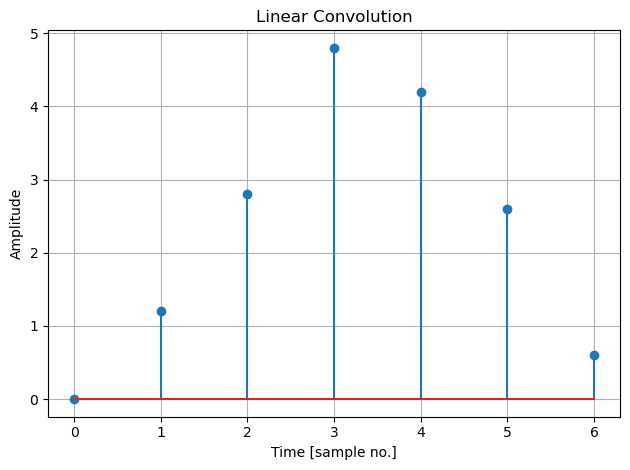

In [9]:
# result (output y) would come out scaled by a factor of 2

import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

x=[0,2,2,2] # this is the example in Fig 2.2
h = [0.6, 0.8, 1, 0.3] # this is the example in Fig 2.2

y=np.convolve(x,h)

plt = plot_signal(y, title='Linear Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex2/ex2_linear_convolution.pdf')
plt.show()

### Difference equation representation

You have seen in lectures that discrete-time LTI systems can also be represented using difference equations, i.e.
$$ \sum_{k=0}^N a_ky[n-k]=\sum_{k=0}^{M}b_k x[n-k]$$
where $a_k$ and $b_k$ are constant coefficients. This forms shows how the output at time $n$, $y[n]$, can be obtained as a weighted sum of past outputs and past and present inputs to the system.

**Question 2.5** Given a system with $a_0=1$, $a_1=-0.25$, $b_0=1$ and all other coefficients zero, write its difference equation.

$y[n] - 0.25y[n-1] = x[n]$

**Question 2.6** Compute the output the system for $x[n]=\delta[n]$ using Python. Calculate $N=5$ output values and assume zero initial conditions. What is the function that you obtain?

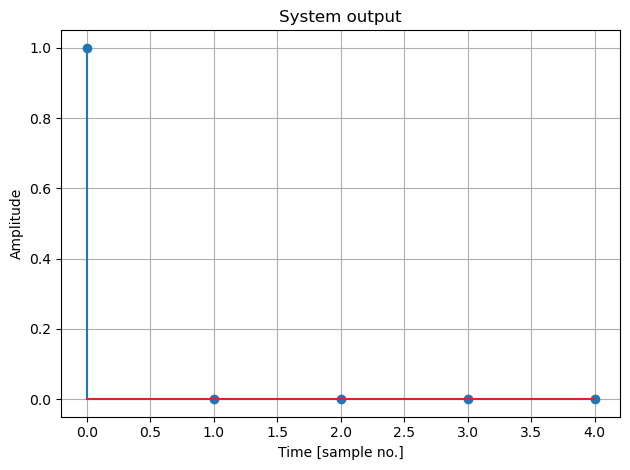

: 

In [16]:
N=5
ic=0 # zero initial conditions
y=[]
x=np.concatenate((np.ones(1),np.zeros(N-1)))
for i in range(N):
    # can obtain recurrence relation below using math
    y.append(x[i] - np.power(0.25,i-1)*x[1])
    # add your code here
    
plt = plot_signal(y, title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex2/ex2_difference_equation.pdf')
plt.show()


**Question 2.7** Increase the value of $N$ to i) 10, ii) 50 iii) 100 and examine the last value of `y` using `print(y[N-1])`. What can you say about this system?

0.0
0.0
0.0


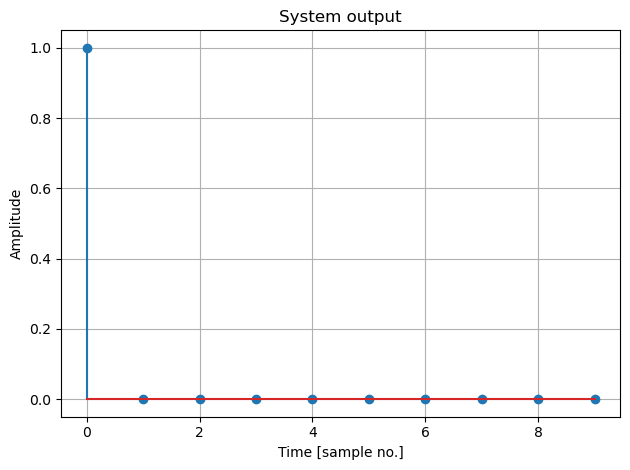

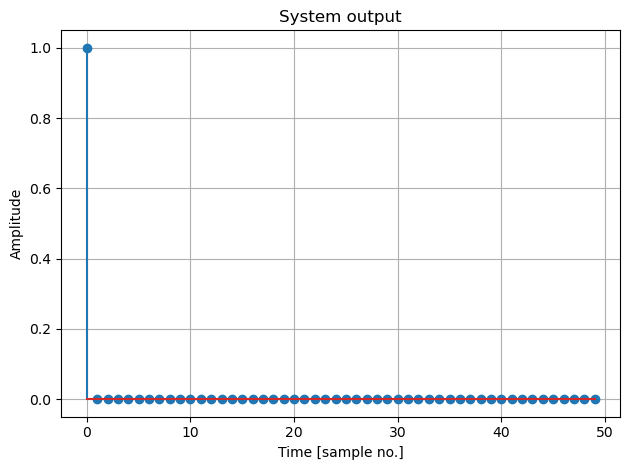

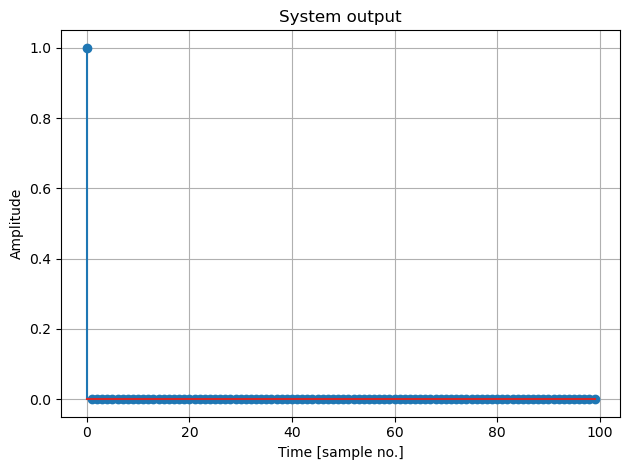

In [10]:

def getY(N):
  
  y=[]
  x=np.concatenate((np.ones(1),np.zeros(N-1)))

  for i in range(N):
      y.append(x[i] - np.power(0.25,i-1)*x[1])
      # add your code here
  return y

y_10 = getY(10)
y_50 = getY(50)
y_100 = getY(100)
print(y_10[9])
print(y_50[49])
print(y_100[99])

plt = plot_signal(y_10, title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex2/ex2_difference_equation.pdf')
plt.show()

plt2 = plot_signal(y_50, title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt2.savefig('results/ex2/ex2_difference_equation2.pdf')
plt2.show()

plt3 = plot_signal(y_100, title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt3.savefig('results/ex2/ex2_difference_equation3.pdf')
plt3.show()

**Question 2.8** Change your code to have $x[n]=0$ and $y[-1]=2$. Compare your plot to Exercise 12 of Problem Sheet 2.

1.9073486328125e-06
1.5777218104420236e-30
1.2446030555722283e-60


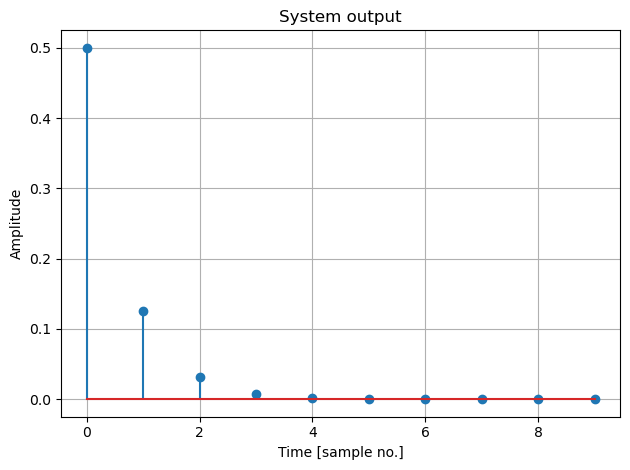

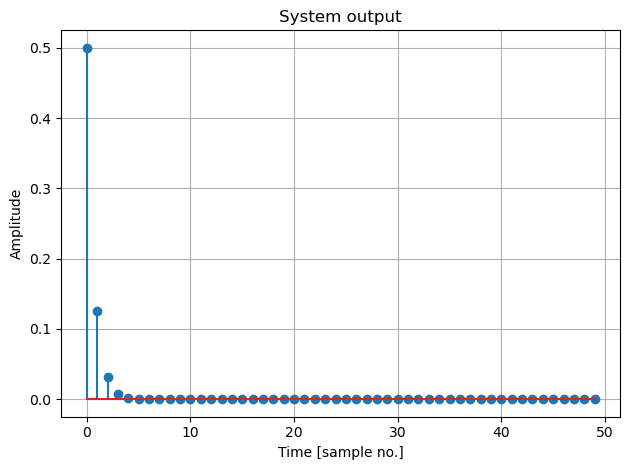

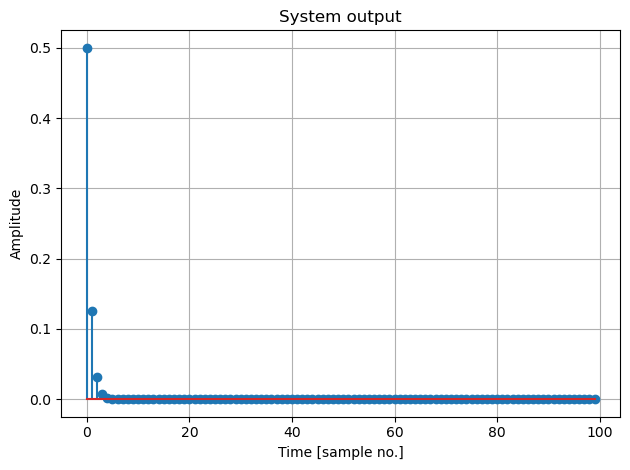

In [12]:

def getY(N):
  
  y=[0.5]
  x=np.concatenate((np.ones(1),np.zeros(N-1)))

  for i in range(1,N):
      y.append(0.25*y[i-1])
      # add your code here
  return y

y_10 = getY(10)
y_50 = getY(50)
y_100 = getY(100)
print(y_10[9])
print(y_50[49])
print(y_100[99])

plt = plot_signal(y_10, title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex2/ex2_difference_equation.pdf')
plt.show()

plt2 = plot_signal(y_50, title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt2.savefig('results/ex2/ex2_difference_equation2.pdf')
plt2.show()

plt3 = plot_signal(y_100, title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt3.savefig('results/ex2/ex2_difference_equation3.pdf')
plt3.show()

In [24]:
import numpy as np
import turtle

# Function to draw a point on the screen
def draw_point(x, y):
    turtle.penup()
    turtle.goto(x, y)
    turtle.pendown()
    turtle.dot(5)

# Parameters
a = 5
f = 5
w = f * (2 * np.pi)

# Create a screen
screen = turtle.Screen()
screen.title("Moving Visualization")
screen.bgcolor("white")

# Set up the Turtle objects
x = np.arange(0, 1, 0.01)
t = np.arange(0, 1, 0.01)
X = np.zeros_like(x)
Y = np.zeros_like(x)

# Create a Turtle window for the rotating frame
turtle1 = turtle.Turtle()
turtle1.penup()
turtle1.color("blue")

# Create a Turtle window for the non-rotating frame
turtle2 = turtle.Turtle()
turtle2.penup()
turtle2.color("red")

# Create a loop for animation
for i in range(len(x)):
    X[i] = x[i] * np.cos(w * t[i]) - y[i] * np.sin(w * t[i])
    Y[i] = x[i] * np.sin(w * t[i]) + y[i] * np.cos(w * t[i])

    # Clear the previous drawing
    turtle1.clear()
    turtle2.clear()

    # Draw the rotating frame
    for j in range(i + 1):
        draw_point(X[j] * 200, Y[j] * 200)

    # Draw the non-rotating frame
    for j in range(i + 1):
        draw_point(x[j] * 200, y[j] * 200)

    turtle1.hideturtle()
    turtle2.hideturtle()

turtle.done()


KeyboardInterrupt: 

Values of X  [3.596689333122482, 3.3256979018935615, 3.053464961255708, 2.7800968282021037, 2.5057002407854467, 2.2303823164417027, 1.9542505101739378, 1.6774125726149647, 1.3999765079791935, 1.1220505319280596, 0.8437430293594774, 0.5651625121401977, 0.28641757679714797, 0.007616862183828843, -0.271130992859292, -0.549717391839919, -0.8280338229200996, -1.1059719011829197, -1.3834234108408934, -1.660280347370393, -1.9364349595533152, -2.2117797914156165, -2.4862077240384055, -2.7596120172313103, -3.0318863510495078, -3.3029248671390867, -3.5726222098922706, -3.840873567402407, -4.107574712194966, -4.372622041724587, -4.635912618620087, -4.897344210662202, -5.156815330478894, -5.414225274940587, -5.669474164245612, -5.922462980673268, -6.173093606995007, -6.421268864526667, -6.666892550807654, -6.909869476890414, -7.150105504230984, -7.387507581159282, -7.621983778920313, -7.853443327270208, -8.081796649613981, -8.306955397669453, -8.528832485648856, -8.74734212393828, -8.9623998522669

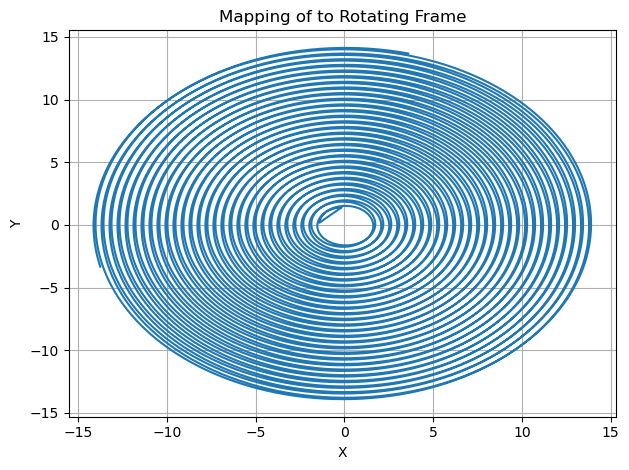

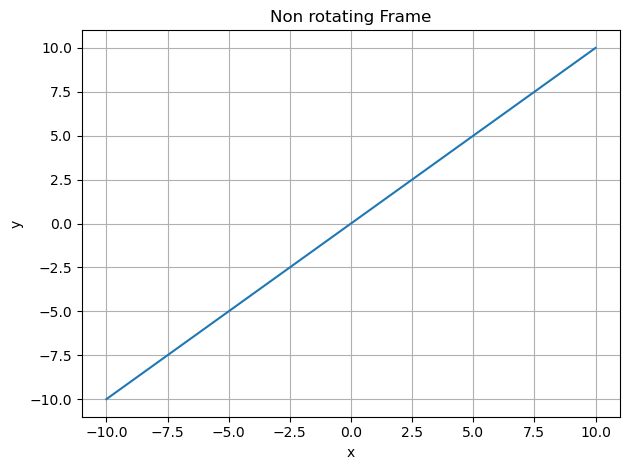

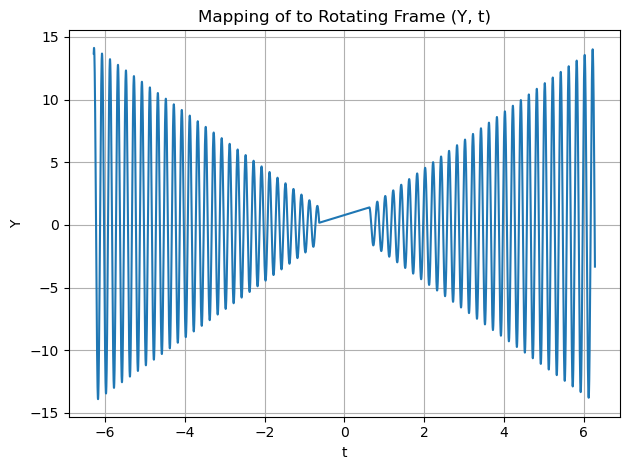

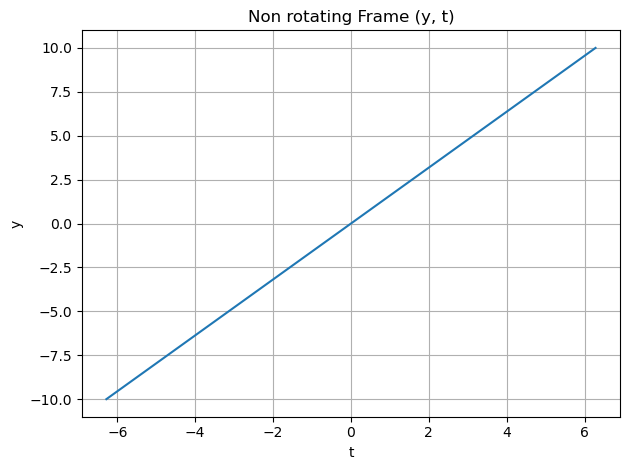

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal



x1 = np.arange(-10, -1, 0.001)
x2 = np.arange(1, 10, 0.001)
t1 = np.arange(-2*np.pi, -0.1*2*np.pi, 0.0001 * 2*np.pi)
t2 = np.arange(0.1*2*np.pi, 2*np.pi, 0.0001 * 2*np.pi)


a = 5
#y = [a for i in range(0, len(x))]
#y = np.sqrt(1- x*x)
y = []
x = []
t = []

for i in range(0,len(t1)):
  t.append(t1[i])

for j in range(0, len(t2)):
  t.append(t2[j])

for i in range(0,len(x1)):
  x.append(x1[i])

for j in range(0, len(x2)):
  x.append(x2[j])

for k in range(0, len(x)):
  y.append(x[k])

f = 5
w = f * (2*np.pi)
X = []
Y = []

for i in range(0, len(x)):
  X.append(x[i]*np.cos(w*t[i]) - y[i]*np.sin(w*t[i]))
  Y.append(x[i]*np.sin(w*t[i]) + y[i]*np.cos(w*t[i]))

print('Values of X ', X)
print('Values of Y: ', Y)

#plt.plot(X, Y) 

#plt.title("Mapping to Rotating Frame")
#plt.xlabel("Values of X")
#plt.ylabel("Values of Y")
#plt.show()

plt1 = plot_signal(X, Y, title='Mapping of to Rotating Frame', xlabel='X', ylabel='Y')
plt2 = plot_signal(x, y, title='Non rotating Frame', xlabel='x', ylabel='y')

plt1 = plot_signal(t, Y, title='Mapping of to Rotating Frame (Y, t)', xlabel='t', ylabel='Y')
plt2 = plot_signal(t, y, title='Non rotating Frame (y, t)', xlabel='t', ylabel='y')

plt1.show()
plt2.show()